- t-SNE = “t-distributed stochastic neighbor embedding” 
- Maps samples to 2D space (or 3D)
- only has `fit_transform` method, have to repeat everytime
- Try `learning_rate` between 50 and 200

### Iris dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
samples = iris['data']
features = iris['feature_names']
species = iris['target']
target_names = iris['target_names']

# map target labels to species names => Ground Truth
#species = target_names[species]

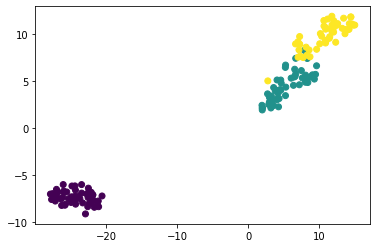

In [4]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)

transformed = model.fit_transform(samples)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()

### Stock price

In [108]:
import pandas as pd
df = pd.read_csv('stock.csv')
df.head()
movements = df.iloc[:,1:].to_numpy()
companies = df.iloc[:,0].to_numpy()

#### Normalize data using a transform

In [112]:
# Perform the necessary imports
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

normalized_movements = normalizer.transform(movements)

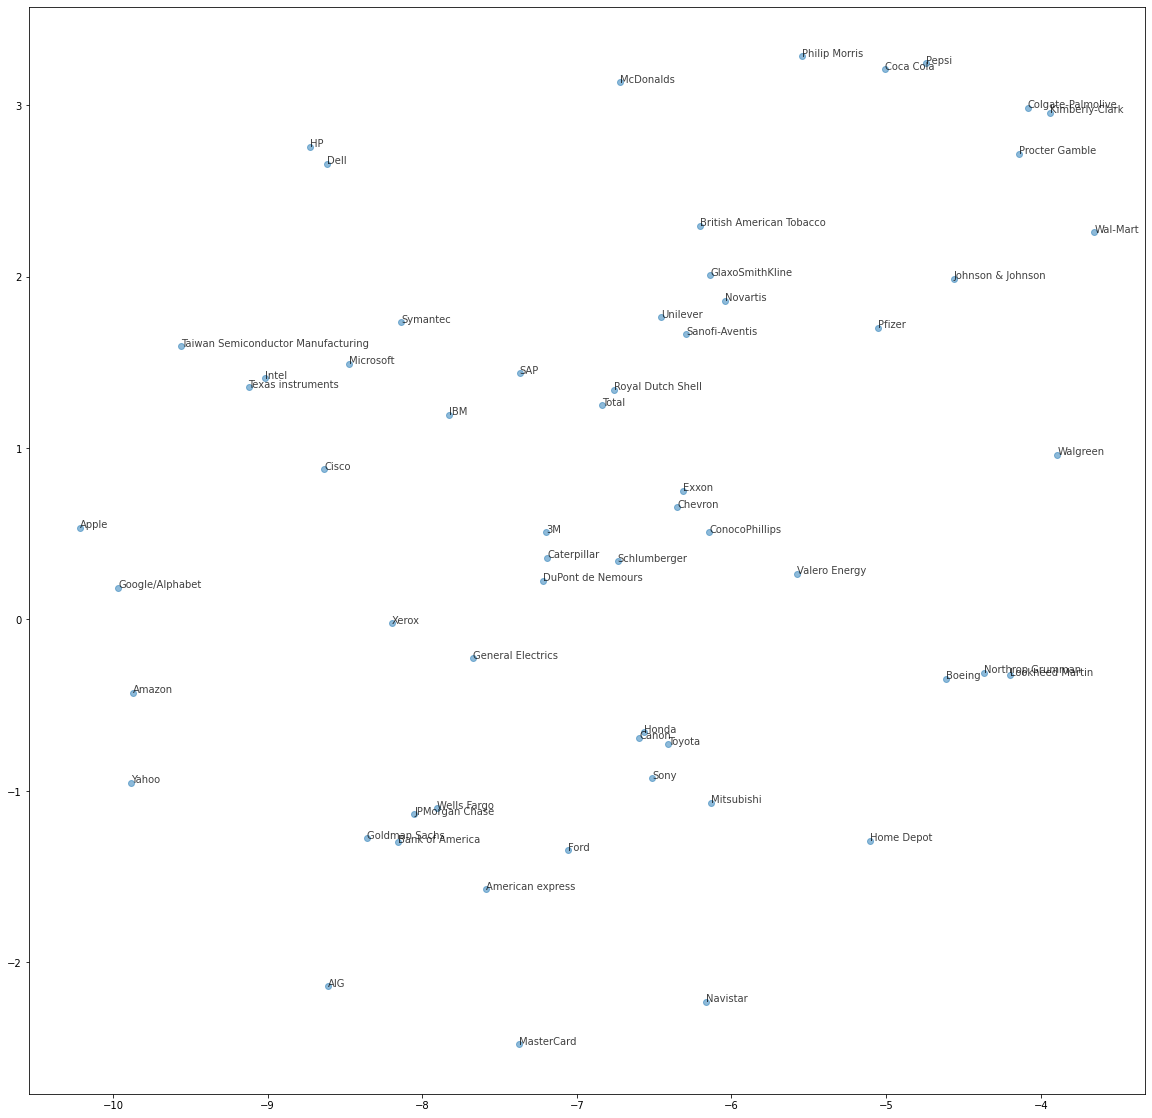

In [117]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    ax.annotate(company, (x, y), fontsize=10, alpha=0.75)
plt.show()
